# Include your local folder containing necessary modules

In [ ]:
import sys
sys.path.insert(0, r'C:\Users\Rayan El Helou\Documents\Projects\ML demos\PyTorch')

# Useful imports

In [2]:
# Standard tools
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from IPython import display
from tqdm import trange

# Custom tools
from neural_nets import torch_plot, BuildSequential

# Generate some training data

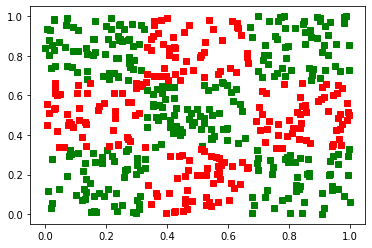

In [3]:
x = torch.rand(500, 2)

# Create condition to classify data ... uncomment lines starting with "condition ="
w = torch.tensor([-2.0, -1.0])
b = torch.tensor([1.5])
# condition = (x @ w + b) > 0
# condition = (10*(x - 0.5)**2 @ w + b) > 0
# condition = torch.sin((30*(x - 0.5)**2 @ w + b)) > 0
f = 3
condition = torch.sin(f*np.pi*x[:,0])*torch.sin(f*np.pi*x[:,1]) > 0

y = 2.0*condition - 1.0
y = y.reshape((len(x),1))

idx_p = torch.where(y==1)[0]
idx_n = torch.where(y==-1)[0]

torch_plot(x[idx_p,0], x[idx_p,1], 'gs')
torch_plot(x[idx_n,0], x[idx_n,1], 'rs')
plt.axis('tight')
plt.show()

# Build & Train a Neural Network in 2 lines of code

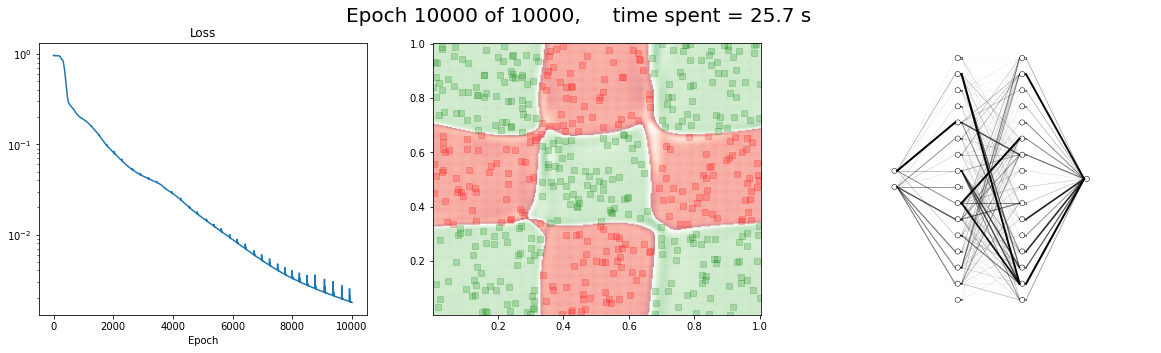

<Figure size 1440x360 with 0 Axes>

In [7]:
net = BuildSequential(2, 16, 16, 1, activation=nn.Sigmoid())

net.train(x, y, weight_penalty=0.00, plot_during=True, lr=0.01, N_epoch=10000)

### Memory occupied by neural network

In [5]:
net.print_memory_size()

1.375 KB and 304 weights


# CHALLENGE TO STUDENT

It looks, from the results above, like the neural network is able to correctly assign the right region color to each point. That is, the regions containing red points are colored red, and so on.

However, it looks like it's over-fitting by creating more 'twists and turns' around the red points than it needs to. What changes would you make to get a simpler shape for each colored region, while still achieving good results?